# Tutorial

In [1]:
import numpy as np
import acoular

In [ ]:
acoular.demo.acoular_demo.run()

Reading the data:

In [2]:
ts = acoular.TimeSamples(name='three_sources.h5')

Creating the power spectra (object containing the cross spectral matrix):

In [3]:
ps = acoular.PowerSpectra(time_data=ts, block_size=128, window='Hanning')

Creating grid where the sources can possibly be located 

In [4]:
rg = acoular.RectGrid(
    x_min=-0.2,
    x_max=0.2,
    y_min=-0.2,
    y_max=0.2,
    z=0.3,
    increment=0.01
    )

Importing the locations of the microphones

In [5]:
from os import path

micgeofile = path.join(path.split(acoular.__file__)[0],'xml','array_64.xml')
mg = acoular.MicGeom(from_file=micgeofile)

Plotting position of the microphones

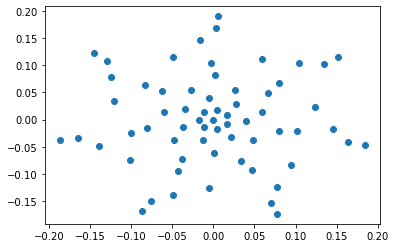

In [6]:
import pylab as plt

plt.ion() # switch on interactive plotting mode
plt.plot(mg.mpos[0],mg.mpos[1],'o')

Creating the steering vector

In [7]:
st = acoular.SteeringVector(grid=rg, mics=mg)

Creating the object that encapsulates the delay-and-sum algorithm (beamforming)

In [8]:
bb = acoular.BeamformerBase(freq_data=ps, steer=st)

The beamforming result mapped onto the grid is queried for a frequency of 8000 Hz and over a third-octave wide frequency band (thus the ‘3’ in the second argument).

Then, the processing starts:
- The data is read from the file
- The cross spectral matrix is computed
- The beamforming is performed. 

Finally, the result (sound pressure squared) is given as an array with the same shape as the grid. Using the helper function L_p, this is converted to decibels

In [9]:
pm = bb.synthetic(8000, 3)
[('three_sources_cache.h5', 1)]

Lm = acoular.L_p(pm)

[('three_sources_cache.h5', 1)]
[('three_sources_cache.h5', 2)]


Plotting the result of the beamforming:

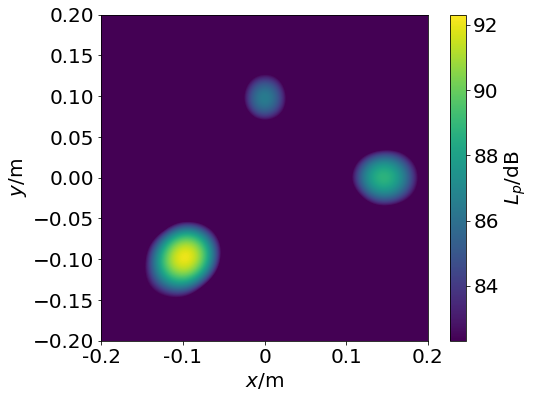

In [15]:
fig = plt.figure(figsize=(8,6)) # open new figure

nb_fontsize = 20

im = plt.imshow(Lm.T, origin='lower', vmin=Lm.max()-10, extent=rg.extend(), interpolation='bicubic')
#plt.colorbar()

plt.xlabel(r"$x/$m", fontsize=nb_fontsize)
plt.ylabel(r"$y/$m", fontsize=nb_fontsize)
plt.xticks(ticks=[-0.2,-0.1,0,0.1,0.2],labels=[-0.2,-0.1,0,0.1,0.2],fontsize=nb_fontsize)

plt.yticks(fontsize=nb_fontsize)

cbar = plt.colorbar(im)
im.figure.axes[1].tick_params(labelsize=nb_fontsize)
cbar.set_label(r'$L_p/$dB', rotation=90, fontsize=nb_fontsize)

plt.savefig('beamforming_example.pdf') 



# Reproduction of the plot of the thesis task

In [11]:
# Generate the data for single source
from os import path
from acoular import __file__ as bpath, MicGeom, WNoiseGenerator, PointSource, Mixer, WriteH5

sfreq = 51200
duration = 10
nsamples = duration*sfreq
micgeofile = path.join(path.split(bpath)[0],'xml','array_64.xml')
h5savefile = 'single_sources.h5'

m = MicGeom(from_file=micgeofile)
n = WNoiseGenerator(sample_freq=sfreq, numsamples=nsamples, seed=1)
p = PointSource(signal=n, mpos=m,  loc=(-0.1,-0.1,0.3))

wh5 = WriteH5(source=p, name=h5savefile)
wh5.save()

/tmp/ipykernel_4512/2746508556.py:13: Warning: Deprecated use of 'mpos' trait. 
  p = PointSource(signal=n, mpos=m,  loc=(-0.1,-0.1,0.3))


In [12]:
# need to create data (timestamps ts_single_source) for a single source
ts_single_source = acoular.TimeSamples(name='single_sources.h5')

# use it to create power spectra
ps_single_source =  acoular.PowerSpectra(time_data=ts_single_source, block_size=128, window='Hanning')

[('three_sources_cache.h5', 2), ('single_sources_cache.h5', 1)]


/home/gaspard/anaconda3/envs/master_arbeit2/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


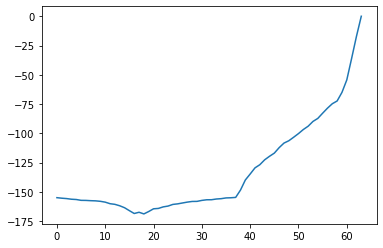

In [13]:
csm = ps_single_source.csm[10]

eva = np.linalg.eigvals(csm)
eva = np.sort(eva)

# convert eigenvalue into levels
eva_lvl = 10*np.log10(eva/np.max(eva))

# plotting
plt.plot(np.arange(eva_lvl.shape[0]), eva_lvl)